In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
cricket = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
cricket.head()
# parse date
# retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

cricket = cricket[['Player','SR','Ave']]
cricket.head()

Player     SR    Ave
0         SR Tendulkar (INDIA)  86.23  44.83
1  KC Sangakkara (Asia/ICC/SL)  78.86  41.98
2         RT Ponting (AUS/ICC)  80.39  42.03
3      ST Jayasuriya (Asia/SL)  91.20  32.36
4   DPMD Jayawardene (Asia/SL)  78.96  33.37

In [3]:
# scale data 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
players = cricket['Player']
cricket = standard_scaler.fit_transform(cricket[['SR','Ave']])

cricket = pd.DataFrame(cricket)
# cricket = pd.concat([players,cricket], axis=1)
# cricket.columns = ['Player','SR','Ave']
cricket.columns = ['SR','Ave']
cricket.head()

SR       Ave
0  0.703152  1.072294
1 -0.044139  0.587725
2  0.110997  0.596226
3  1.207091 -1.047909
4 -0.034000 -0.876185

In [4]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(cricket)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# analysis of clusters formed
model_clus5.index = pd.RangeIndex(len(cricket.index))
model_clus5_km = pd.concat([cricket, pd.Series(model_clus5.labels_)], axis=1)
model_clus5_km.columns = [ 'SR', 'Ave','ClusterID']
model_clus5_km.head()

SR       Ave  ClusterID
0  0.703152  1.072294          3
1 -0.044139  0.587725          0
2  0.110997  0.596226          0
3  1.207091 -1.047909          1
4 -0.034000 -0.876185          2

In [6]:
model_clus5_km = pd.concat([players,model_clus5_km],axis=1)

In [7]:
model_clus5_km.to_csv("out.csv")

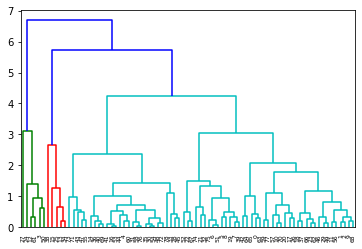

In [21]:
# Kmeans with K=5
mergings = linkage(cricket, method='complete', metric='euclidean')
dendrogram(model_clus5)
plt.show()

In [32]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

RFM_hc = pd.concat([players, clusterCut], axis=1)

RFM_hc.columns = ['Player',  'ClusterID']
RFM_hc.to_csv("out2.csv")